In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.MNIST('data', download=True, train=True, transform=transform)
valset = datasets.MNIST('data', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

0.3%

65.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



102.8%

Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw


46.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



112.7%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [3]:
images, labels = next(iter(trainloader))

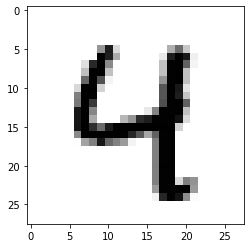

In [4]:
plt.imshow(images[50].numpy().squeeze(), cmap='gray_r');

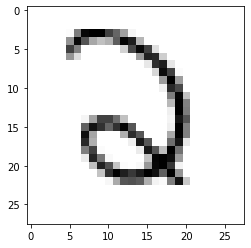

In [5]:
plt.imshow(images[15].numpy().squeeze(), cmap='gray_r');

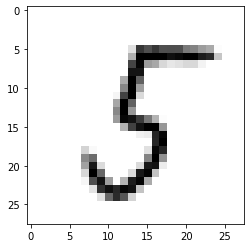

In [6]:
plt.imshow(images[27].numpy().squeeze(), cmap='gray_r');

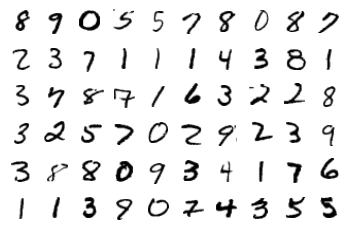

In [13]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [8]:
input_size = 784 #pixels
output_size = 10

model1 = nn.Sequential(nn.Linear(input_size, 420),
                      nn.ReLU(),
                      nn.Linear(420, 128),
                      nn.ReLU(),
                      nn.Linear(128, output_size),
                      nn.LogSoftmax(dim=1))

model2 = nn.Sequential(nn.Linear(input_size, 70),
                       nn.ReLU(),
                       nn.Linear(70, 420),
                       nn.ReLU(),
                       nn.Linear(420, 2137),
                       nn.ReLU(),
                       nn.Linear(2137, output_size),
                       nn.LogSoftmax(dim=1))

model3 = nn.Sequential(nn.Linear(input_size, 666),
                       nn.ReLU(),
                       nn.Linear(666, 420),
                       nn.ReLU(),
                       nn.Linear(420, 34),
                       nn.ReLU(),
                       nn.Linear(34, output_size),
                       nn.LogSoftmax(dim=1))

model4 = nn.Sequential(nn.Linear(input_size, 2137),
                       nn.ReLU(),
                       nn.Linear(2137, output_size),
                       nn.LogSoftmax(dim=1))

model5 = nn.Sequential(nn.Linear(input_size, 50),
                       nn.ReLU(),
                       nn.Linear(50, 50),
                       nn.ReLU(),
                       nn.Linear(50, 50),
                       nn.ReLU(),
                       nn.Linear(50, 50),
                       nn.ReLU(),
                       nn.Linear(50, 50),
                       nn.ReLU(),
                       nn.Linear(50, output_size),
                       nn.LogSoftmax(dim=1))

models = [model1, model2, model3, model4, model5]

In [9]:
model=model5

In [71]:
def train():
    optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
    epochs = 15
    for e in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

            # Training pass
            optimizer.zero_grad()

            output = model(images)
            loss = criterion(output, labels)

            #This is where the model learns by backpropagating
            loss.backward()

            #And optimizes its weights here
            optimizer.step()

            running_loss += loss.item()
        else:
            print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

In [72]:
i = 1
for model in models:
    print(model)
    criterion = nn.NLLLoss() #funkcja straty
    images, labels = next(iter(trainloader))
    images = images.view(images.shape[0], -1)

    logps = model(images) #log probabilities
    loss = criterion(logps, labels) #calculate the NLL loss

    train()
    print()
    torch.save(model, f'./model{i}.pt')
    i+=1

Sequential(
  (0): Linear(in_features=784, out_features=420, bias=True)
  (1): ReLU()
  (2): Linear(in_features=420, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Epoch 0 - Training loss: 0.16523613525367875
Epoch 1 - Training loss: 0.1340565619462017
Epoch 2 - Training loss: 0.11407040905302712
Epoch 3 - Training loss: 0.09762154522437308
Epoch 4 - Training loss: 0.08533004156228449
Epoch 5 - Training loss: 0.07579200526625951
Epoch 6 - Training loss: 0.06722673198093039
Epoch 7 - Training loss: 0.06045778955507682
Epoch 8 - Training loss: 0.05379582325101836
Epoch 9 - Training loss: 0.048918378178967534
Epoch 10 - Training loss: 0.04402201053058939
Epoch 11 - Training loss: 0.0403728147691636
Epoch 12 - Training loss: 0.03639520074241856
Epoch 13 - Training loss: 0.03244095677852448
Epoch 14 - Training loss: 0.030254004926764284

Sequential(
  (0): Linear(in_features=784, out_features=69, bias=True)
  

In [41]:
def view_classify(img, ps, a, b):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap="gray_r")
    ax1.axis('off')
    ax1.set_title(f" label = {a}\n predicted = {b}")
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

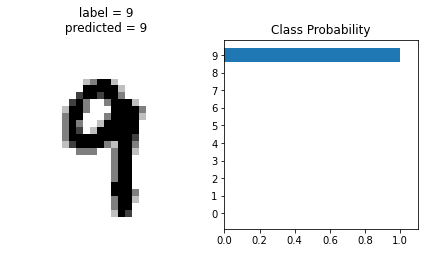

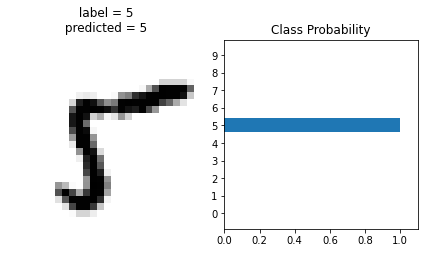

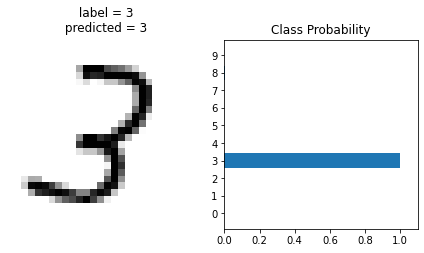

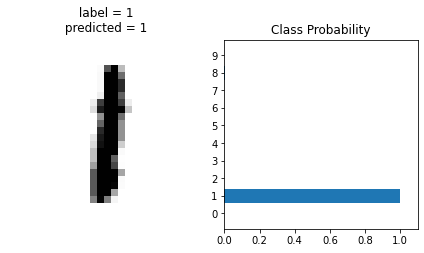

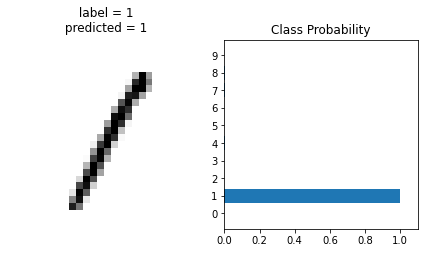

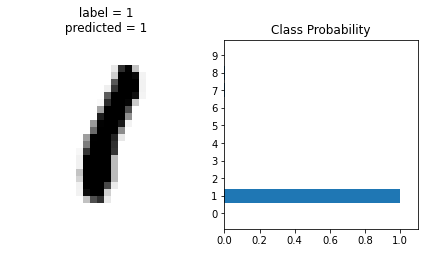

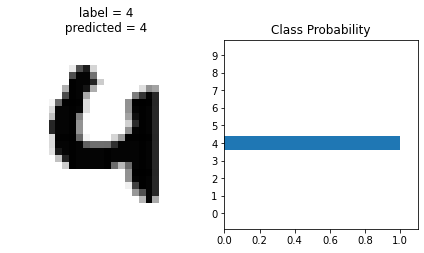

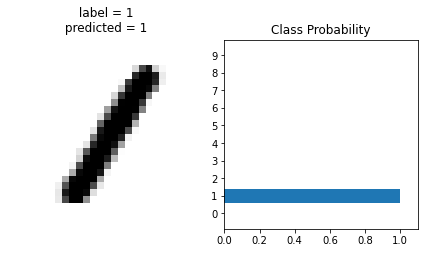

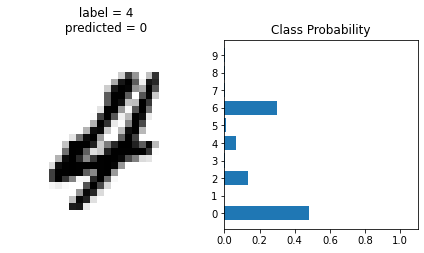

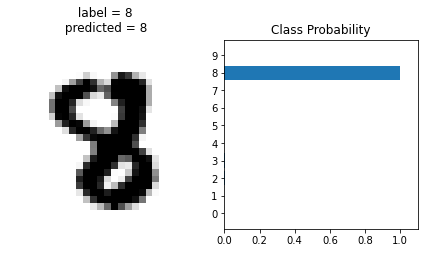

In [43]:
model = torch.load("model1.pt")
for _ in range(10):
    images, labels = next(iter(valloader))


    img = images[0].view(1, 784)
    # plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    # print("Predicted Digit =", )
    # torch.save(model, './my_mnist_model.pt')
    view_classify(img.view(1, 28, 28), ps, labels[0], probab.index(max(probab)))

In [44]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)


        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if true_label == pred_label:
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9789
